<a href="https://colab.research.google.com/github/Bcopeland64/Data-Science-Notebooks/blob/master/Keras_Image_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Preprocessing Stage of Data/Images <h1>

In [3]:
%tensorflow_version 1.x
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
train_path = '../content/drive/My Drive/cat-and-dog/train'
valid_path = '../content/drive/My Drive/cat-and-dog/valid'
test_path = '../content/drive/My Drive/cat-and-dog/test'

In [5]:


train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=['dog', 'cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224), classes=['dog', 'cat'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=['dog', 'cat'], batch_size=10)



Found 74 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 85 images belonging to 2 classes.


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def plots(ims, figsize=(12, 6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose(0, 2, 3, 1)
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [0]:
imgs, labels=next(train_batches)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


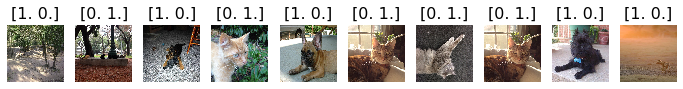

In [10]:
plots(imgs, titles=labels)

<h1> Build and Train CNN <h1>

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    Flatten(),
    Dense(2, activation='softmax')
])

In [12]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





 - 14s - loss: 7.1180 - acc: 0.5500 - val_loss: 7.0517 - val_acc: 0.5625
Epoch 2/5
 - 12s - loss: 9.3106 - acc: 0.4224 - val_loss: 5.0369 - val_acc: 0.6875
Epoch 3/5
 - 0s - loss: 8.4099 - acc: 0.4782 - val_loss: 6.0443 - val_acc: 0.6250
Epoch 4/5
 - 1s - loss: 7.6561 - acc: 0.5250 - val_loss: 6.0443 - val_acc: 0.6250
Epoch 5/5
 - 5s - loss: 9.7941 - acc: 0.3924 - val_loss: 8.0590 - val_acc: 0.5000


<h1> Predict <h1>

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


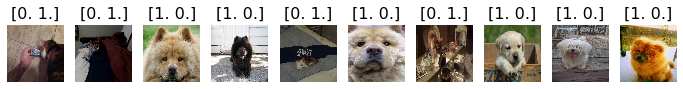

In [14]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [15]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 1., 1., 0., 1., 0., 1., 1., 1.], dtype=float32)

In [0]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [17]:
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [0]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [0]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    
    """This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True"""
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[1, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without Normalization")
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    

Confusion Matrix without Normalization
[[4 0]
 [6 0]]


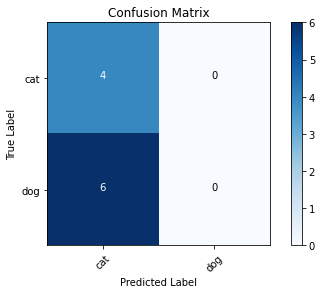

In [21]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

<h1> *Build Our VGG16 Model* <h1>

In [22]:
vgg16_model = keras.applications.vgg16.VGG16()


553467904/553467096 [==============================] - 17s 0us/step


In [23]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [24]:
type(vgg16_model)

keras.engine.training.Model

In [0]:
model = Sequential()
for layer in vgg16_model.layers:
  model.add(layer)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [29]:
model.layers.pop()

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
for layer in model.layers:
  layer.trainable = False

In [0]:
model.add(Dense(2, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

<h1> Train the tuned VGG16 Model <h1>

In [0]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.fit_generator(train_batches, steps_per_epoch=4, validation_steps=4, epochs=20, verbose=2)

Epoch 1/20
 - 1s - loss: 0.6969 - acc: 0.4182
Epoch 2/20
 - 0s - loss: 0.6922 - acc: 0.5750
Epoch 3/20
 - 0s - loss: 0.6923 - acc: 0.5518
Epoch 4/20
 - 1s - loss: 0.6945 - acc: 0.5250
Epoch 5/20
 - 1s - loss: 0.6940 - acc: 0.6000
Epoch 6/20
 - 0s - loss: 0.6929 - acc: 0.4959
Epoch 7/20
 - 1s - loss: 0.6903 - acc: 0.5476
Epoch 8/20
 - 0s - loss: 0.6951 - acc: 0.5750
Epoch 9/20
 - 1s - loss: 0.6937 - acc: 0.5500
Epoch 10/20
 - 0s - loss: 0.6905 - acc: 0.6035
Epoch 11/20
 - 1s - loss: 0.6889 - acc: 0.6500
Epoch 12/20
 - 0s - loss: 0.6941 - acc: 0.5259
Epoch 13/20
 - 1s - loss: 0.6924 - acc: 0.6250
Epoch 14/20
 - 0s - loss: 0.6895 - acc: 0.5818
Epoch 15/20
 - 1s - loss: 0.6915 - acc: 0.5750
Epoch 16/20
 - 0s - loss: 0.6884 - acc: 0.6894
Epoch 17/20
 - 1s - loss: 0.6875 - acc: 0.7250
Epoch 18/20
 - 0s - loss: 0.6955 - acc: 0.5259
Epoch 19/20
 - 1s - loss: 0.6932 - acc: 0.6335
Epoch 20/20
 - 0s - loss: 0.6890 - acc: 0.6500


<h1> Predict Using the Tuned VGG16 Model <h1>

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


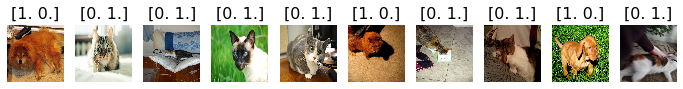

In [51]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [52]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 0., 0., 0., 1., 0., 0., 1., 0.], dtype=float32)

In [0]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0 )

In [0]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion Matrix without Normalization
[[2 5]
 [1 2]]


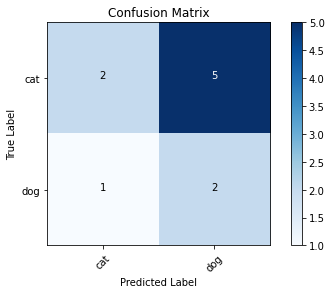

In [55]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')